# Common Libraries

In [14]:
import os
import sys
import numpy as np
import nibabel as nb
from scipy import stats
from pathlib import Path
import matplotlib.pylab as plt
from scipy.stats import ttest_1samp

# Custom Libraries

In [16]:
sys.path.append(os.path.join(str(Path.cwd().parent), "src", "easysurfvis", "cores"))
from surface_data import surf_paths, sample_dir_path
from surface_util import gaussian_weighted_smoothing, get_bounding_box

sys.path.append(os.path.join(str(Path.cwd().parent), "src", "easysurfvis"))
from surface_visualization import show_both_hemi_stats

# Params

In [17]:
save_dir_path = "/mnt/ext1/seojin/temp"

# Load datas

In [18]:
# Sample datas
l_sample_data1_path = os.path.join(sample_dir_path, "l_sampling_datas1.npy")
r_sample_data1_path = os.path.join(sample_dir_path, "r_sampling_datas1.npy")

l_sample_data2_path = os.path.join(sample_dir_path, "l_sampling_datas2.npy")
r_sample_data2_path = os.path.join(sample_dir_path, "r_sampling_datas2.npy")

l_sample_datas1 = np.load(l_sample_data1_path)
r_sample_datas1 = np.load(r_sample_data1_path)

l_sample_datas2 = np.load(l_sample_data2_path)
r_sample_datas2 = np.load(r_sample_data2_path)

# Aggregate datas

In [19]:
# Mean
l_data1_mean = np.mean(l_sample_datas1, axis = 1)
r_data1_mean = np.mean(r_sample_datas1, axis = 1)

# Smoothing
l_template_path = surf_paths("L")[f"L_template_surface_path"]
r_template_path = surf_paths("R")[f"R_template_surface_path"]
l_vertex_locs = nb.load(l_template_path).darrays[0].data[:, :2]
r_vertex_locs = nb.load(r_template_path).darrays[0].data[:, :2]

l_smoothed_data = gaussian_weighted_smoothing(coords = l_vertex_locs, 
                                              values = l_data1_mean, 
                                              sigma = 2)

r_smoothed_data = gaussian_weighted_smoothing(coords = r_vertex_locs, 
                                              values = r_data1_mean, 
                                              sigma = 2)

# Surface map

save: /mnt/ext1/seojin/temp/L_hemi_stat.png
save: /mnt/ext1/seojin/temp/R_hemi_stat.png
save: /mnt/ext1/seojin/temp/colorbar.png
save: /mnt/ext1/seojin/temp/both_hemi_stat.png


<Figure size 640x480 with 0 Axes>

<Figure size 1000x100 with 0 Axes>

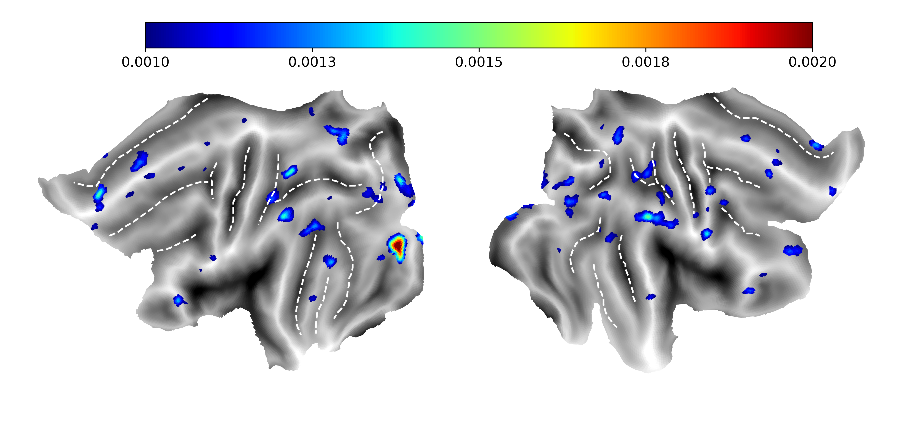

In [24]:
fig, axis = show_both_hemi_stats(l_stat = l_smoothed_data,
                                 r_stat = r_smoothed_data,
                                 threshold = 0.001,
                                 cscale = (0.001, 0.002),
                                 save_dir_path = save_dir_path,
                                 left_bounding_box = None,
                                 right_bounding_box = None,
                                 is_focusing_bounding_box = False)

# Surface map - statistics

In [8]:
l_data1_t_stat = ttest_1samp(l_sample_datas1, axis = 1, popmean = 0)
r_data1_t_stat = ttest_1samp(r_sample_datas1, axis = 1, popmean = 0)

In [9]:
_, n_subj = l_sample_datas1.shape
df = n_subj - 1

lower_alpha = 0.05
t_crit_lower_bound = stats.t.ppf(1 - lower_alpha / 2, df)

upper_alpha = 0.001
t_crit_upper_bound = stats.t.ppf(1 - upper_alpha / 2, df)

save: /mnt/ext1/seojin/temp/L_hemi_stat.png
save: /mnt/ext1/seojin/temp/R_hemi_stat.png
save: /mnt/ext1/seojin/temp/colorbar.png
save: /mnt/ext1/seojin/temp/both_hemi_stat.png


<Figure size 640x480 with 0 Axes>

<Figure size 1000x100 with 0 Axes>

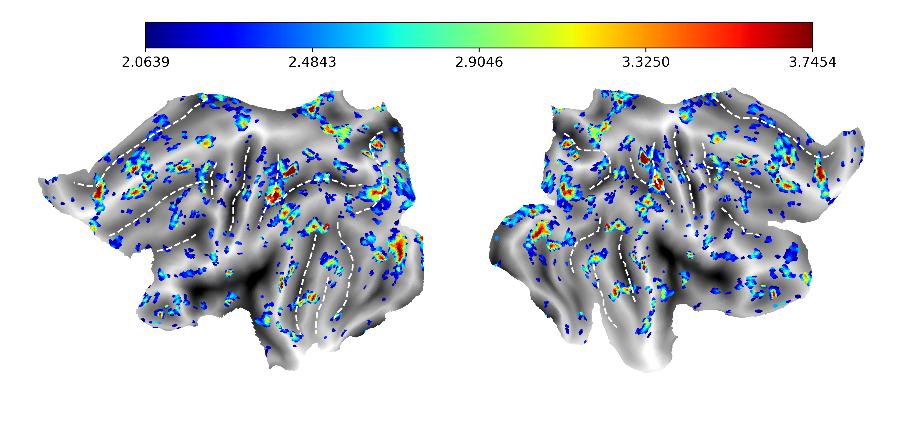

In [10]:
fig, axis = show_both_hemi_stats(l_stat = l_data1_t_stat.statistic,
                                 r_stat = l_data1_t_stat.statistic,
                                 threshold = t_crit_lower_bound,
                                 cscale = (t_crit_lower_bound, t_crit_upper_bound),
                                 save_dir_path = save_dir_path,
                                 left_bounding_box = None,
                                 right_bounding_box = None,
                                 is_focusing_bounding_box = False)

# Focused areas

In [12]:
l_virtual_stip_path = os.path.join(sample_dir_path, "l_virtual_strip_mask.npy")
l_bounding_box = get_bounding_box("L", np.load(l_virtual_stip_path))

r_virtual_stip_path = os.path.join(sample_dir_path, "r_virtual_strip_mask.npy")
r_bounding_box = get_bounding_box("R", np.load(r_virtual_stip_path))

print(f"left bounding box: {l_bounding_box}")
print(f"rirght bounding box: {r_bounding_box}")

left bounding box: {'left_bottom': (-33.670013, 31.466553), 'width': 124.573944, 'height': 95.28895}
rirght bounding box: {'left_bottom': (-84.24796, 5.954762), 'width': 116.31413, 'height': 90.507515}


save: /mnt/ext1/seojin/temp/L_hemi_stat.png
save: /mnt/ext1/seojin/temp/R_hemi_stat.png
save: /mnt/ext1/seojin/temp/colorbar.png
save: /mnt/ext1/seojin/temp/both_hemi_stat.png


<Figure size 640x480 with 0 Axes>

<Figure size 1000x100 with 0 Axes>

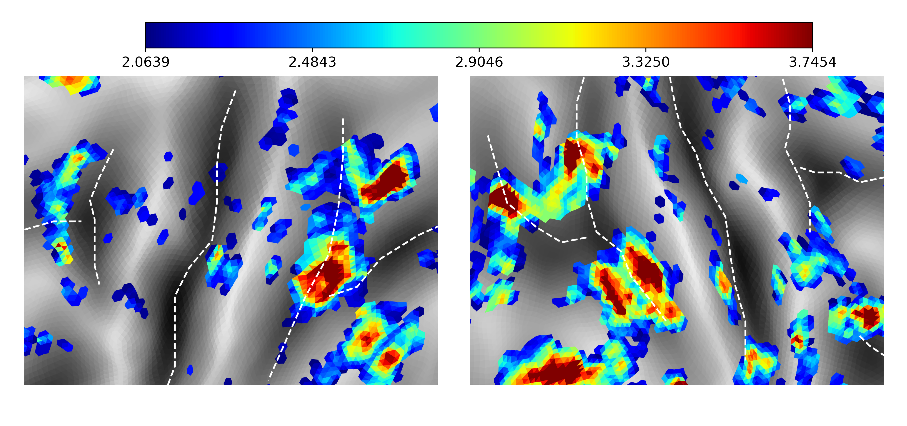

In [13]:
fig, axis = show_both_hemi_stats(l_stat = l_data1_t_stat.statistic,
                                 r_stat = r_data1_t_stat.statistic,
                                 threshold = t_crit_lower_bound,
                                 cscale = (t_crit_lower_bound, t_crit_upper_bound),
                                 save_dir_path = save_dir_path,
                                 left_bounding_box = l_bounding_box,
                                 right_bounding_box = r_bounding_box,
                                 is_focusing_bounding_box = True)